In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,SGDRegressor
import matplotlib.pyplot as pl
from sklearn.metrics import r2_score
from sklearn.preprocessing import add_dummy_feature

In [2]:
df=load_diabetes()

In [3]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
data=df.data
target=df.target
print(data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [5]:
print(target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [7]:
data=sc.fit_transform(data)
new_c=np.ones((data.shape[0],1))
data1=np.hstack((data,new_c))
print(data1[0])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=42)

[ 0.80050009  1.06548848  1.29708846  0.45984057 -0.92974581 -0.73206462
 -0.91245053 -0.05449919  0.41853093 -0.37098854  1.        ]


# Using SVD

In [8]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(r2_score(y_test,y_pred))

0.45260276297191926


# Using SGD

In [9]:
model=SGDRegressor(max_iter=1000,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(r2_score(y_test,y_pred))
weights = model.coef_
intercept = model.intercept_

print("Weights:", weights)
print("Intercept:", intercept)

0.4555738341969293
Weights: [  2.01012851 -11.3683114   26.51176118  16.47680046  -6.0447379
  -4.66170233 -10.28473304   6.52887228  20.6797854    2.64643462]
Intercept: [151.41172729]


# Using Normal Equation

In [13]:
x_train,x_test,y_train,y_test=train_test_split(data1,target,test_size=0.2,random_state=42)
#x_tx_1=np.linalg.inv(np.dot(x_train.T,x_train))
x_tx_1=np.linalg.inv((x_train.T@x_train))
#theta=np.dot(np.dot(x_tx_1,x_train.T),y_train)
theta=((x_tx_1@x_train.T)@y_train)
print(theta)
#y_pred=np.dot(x_test,theta)
y_pred=(x_test@theta)
print(r2_score(y_test,y_pred))

[  1.80291044 -11.50907105  25.80070495  16.53858529 -44.30640613
  24.64170961   7.77309591  13.09553713  35.01740872   2.31502709
 151.34560454]
0.4526027629719198


# Using GD

In [14]:

def gd(x,y,eta,epochs):
    np.random.seed(42)
    m=len(x)
    theta=np.random.randn(x.shape[1],1)
    for _ in range(epochs):
        grads=np.dot(x.T,(np.dot(x,theta)-y))*(2/m)
        theta-=eta*grads
    return theta


In [15]:
x_train,x_test,y_train,y_test=train_test_split(data1,target,test_size=0.2,random_state=42)
y_train=y_train.reshape(-1,1)
print(x_train[0])
theta=gd(x_train,y_train,0.001,10000).reshape(-1,1)

print(theta)


[ 1.48782782  1.06548848  0.25474221  1.18365854  0.71913607  1.03891555
 -0.83504852  0.72130245  0.57529619 -0.02265729  1.        ]
[[  1.99744299]
 [-11.44160934]
 [ 26.46574516]
 [ 16.33383766]
 [-10.17824655]
 [ -2.18143459]
 [ -7.47890572]
 [  8.486893  ]
 [ 21.90936986]
 [  2.55831572]
 [151.3087772 ]]


In [16]:
y_pred=np.dot(x_test,theta)
print(r2_score(y_test,y_pred))

0.4551037816652579


# Using Mini-Batch GD

In [17]:
def mgd(x,y,batch_size,eta,epochs):
    theta=np.random.randn(x.shape[1],1)
    m=len(x)
    for _ in range(epochs):
        for i in range(m):
            rand_ind=np.random.randint(m-batch_size)
            x_i=x[rand_ind:rand_ind+batch_size]
            y_i=y[rand_ind:rand_ind+batch_size]
            grads=np.dot(x_i.T,np.dot(x_i,theta)-y_i)*(2/batch_size)
            theta-=eta*grads
    return theta

In [18]:
x_train,x_test,y_train,y_test=train_test_split(data1,target,test_size=0.2,random_state=42)
y_train=y_train.reshape(-1,1)
print(x_train[0])
theta=mgd(x_train,y_train,10,0.001,10000).reshape(-1,1)

print(theta)


[ 1.48782782  1.06548848  0.25474221  1.18365854  0.71913607  1.03891555
 -0.83504852  0.72130245  0.57529619 -0.02265729  1.        ]
[[  3.48643343]
 [-11.55434588]
 [ 24.88212674]
 [ 15.30240903]
 [-43.96385743]
 [ 23.41051443]
 [  7.22100509]
 [ 13.90554019]
 [ 34.08441563]
 [  1.00552005]
 [149.83046088]]


In [19]:
y_pred=np.dot(x_test,theta)
print(r2_score(y_test,y_pred))

0.442074126041924


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve

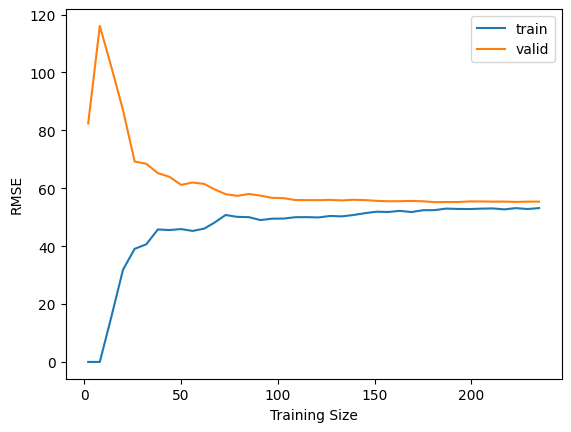

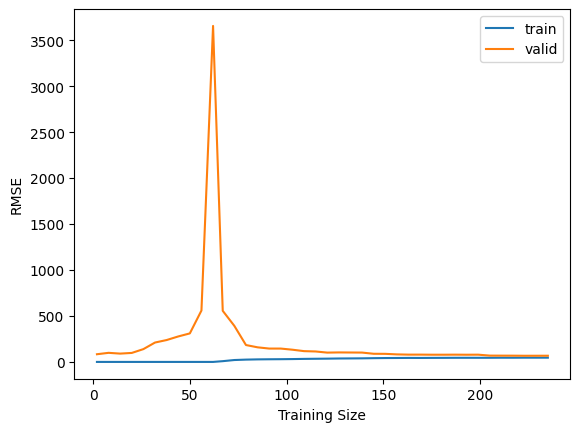

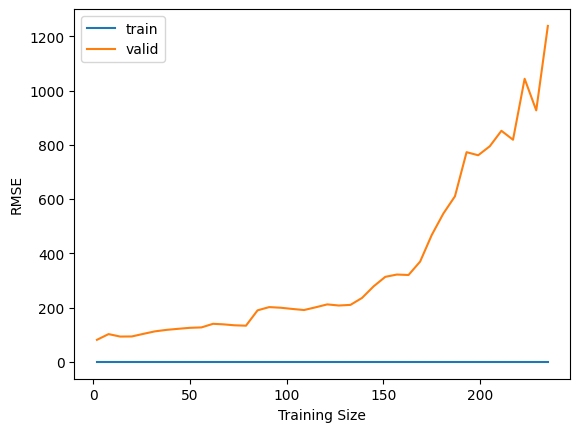

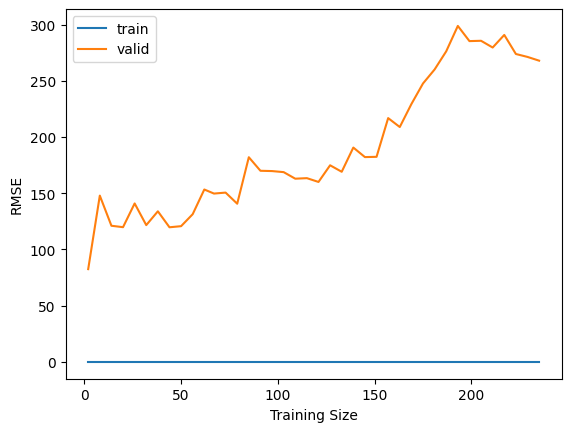

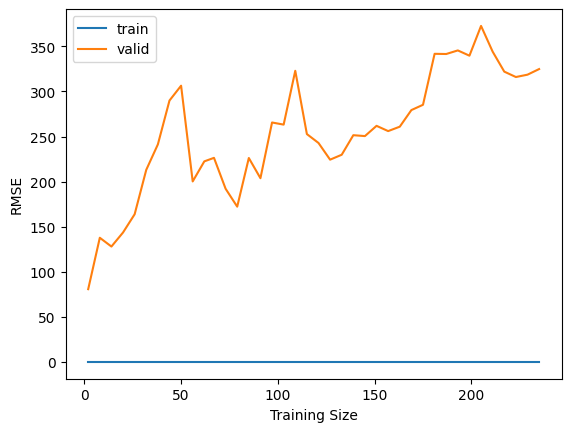

In [21]:
model=LinearRegression()
for i in range(1,6):
    poly_features=PolynomialFeatures(degree=i,include_bias=False)
    data1_p=poly_features.fit_transform(data1)
    x_train,x_test,y_train,y_test=train_test_split(data1_p,target,test_size=0.2,random_state=42)
    #x_train,y_train=data1_p,target
    train_s,train_sc,valid_sc=learning_curve(model,x_train,y_train,train_sizes=np.linspace(0.01,1.0,40),cv=3,scoring='neg_root_mean_squared_error')
    train_e=-train_sc.mean(axis=1)
    valid_e=-valid_sc.mean(axis=1)
    pl.plot(train_s,train_e,label='train')
    pl.plot(train_s,valid_e,label='valid')
    pl.ylabel('RMSE')
    pl.xlabel('Training Size')
    pl.legend()
    pl.show()

In [22]:
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test=train_test_split(data1,target,test_size=0.2,random_state=42)
ridge=Ridge(alpha=0.1,solver='cholesky')
ridge.fit(x_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [23]:
y_pred=ridge.predict(x_test)
print(r2_score(y_test,y_pred))

0.4528170794582622
